# 1.5.10

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('4.png',0) # queryImage
img2 = cv2.imread('1.png',0) # trainImage
#img3 = cv2.imread('sim1.png',0)
#img4 = cv2.imread('sim1.png',0)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

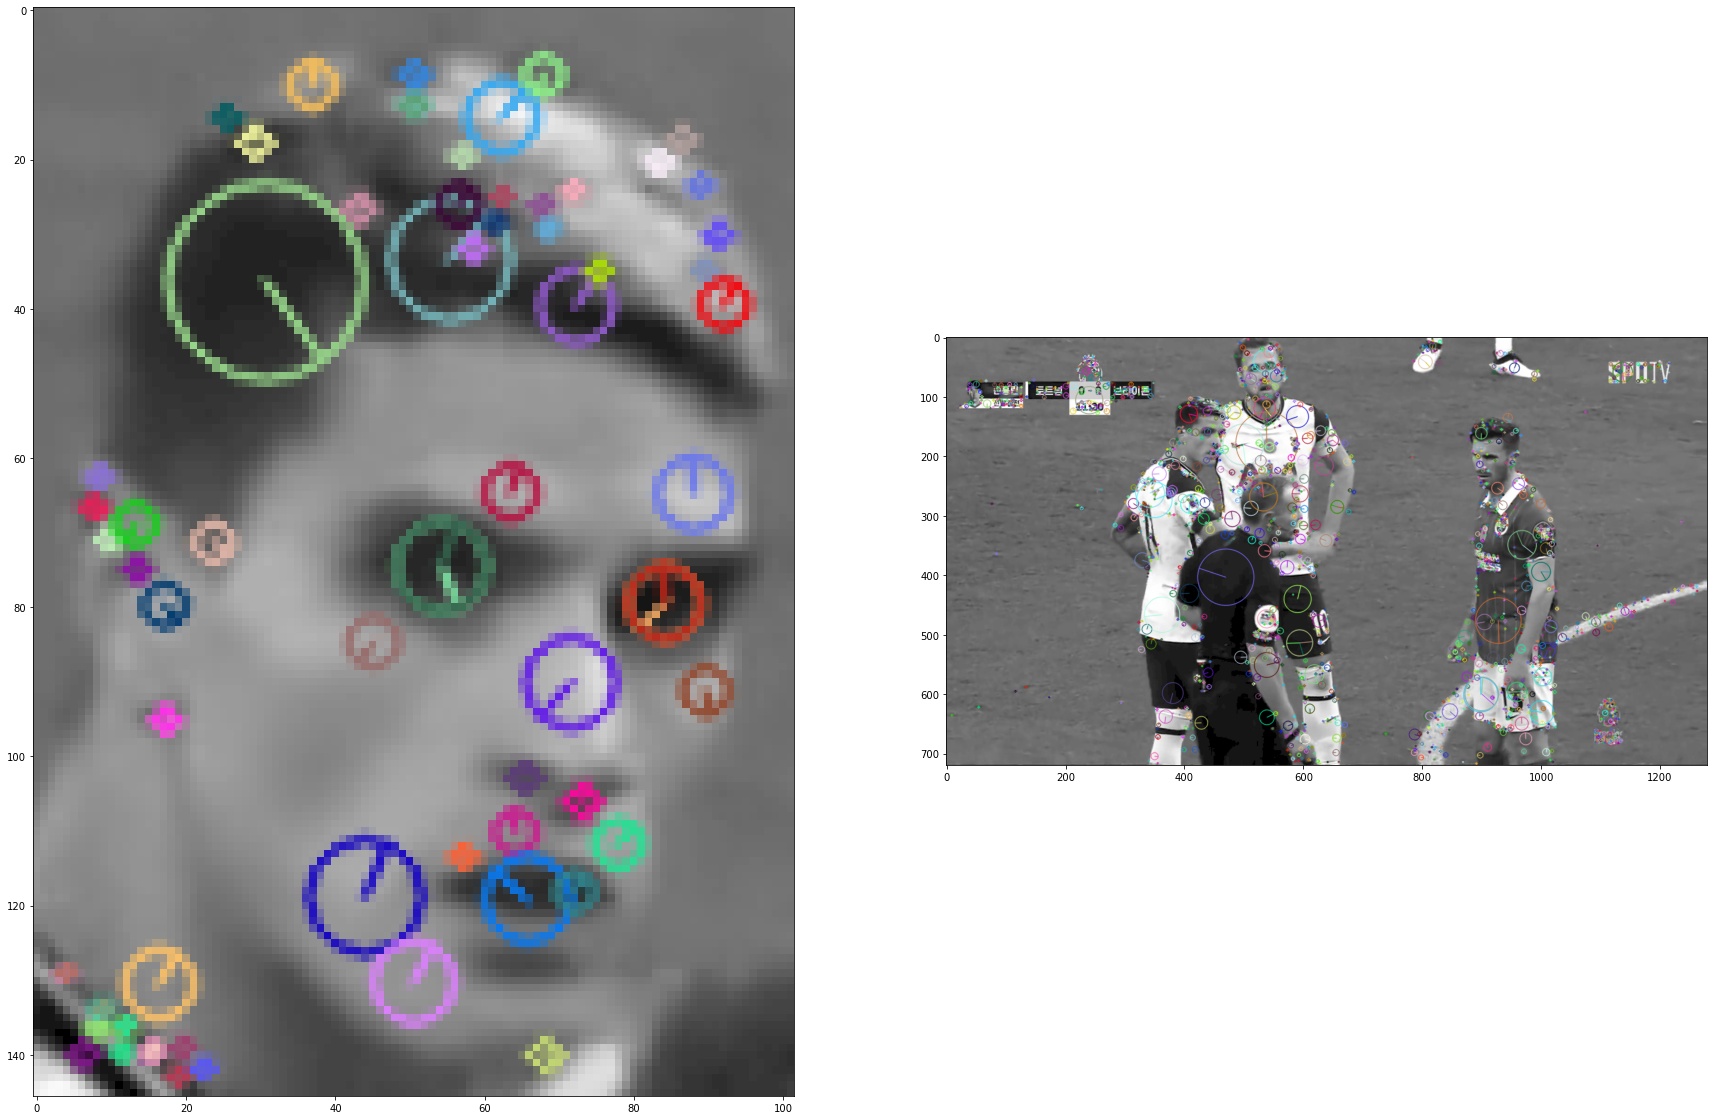

In [3]:
img1v = cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v = cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(30,26))
plt.subplot(1,2,1),plt.imshow(img1v)
plt.subplot(1,2,2),plt.imshow(img2v)
plt.show()

In [4]:
cv2.imwrite('out.png',img1v)

True

In [5]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []

for m,n in matches:
    if m.distance < 0.25*n.distance:
        good.append([m])

In [6]:
print(len(good))

0


In [7]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
singlePointColor = None, matchesMask = matchesMask, # draw only inliers
flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

NameError: name 'MIN_MATCH_COUNT' is not defined